<a href="https://colab.research.google.com/github/SanjayBista1010/Classification/blob/main/DiseaseRiskAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('disease_risk.csv')
df

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,...,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,95395,22,Female,162.932524,67.564516,25.450898,25.450898,76.352693,25.343248,97.087870,...,Low,2,NaN,No,No,0,1.0,5.5,1.336250,healthy
1,5448,47,Female,171.547964,52.804671,17.943254,17.943254,53.829762,18.053942,95.888834,...,High,3,NaN,Yes,Yes,0,1.0,5.5,1.180061,diseased
2,73751,55,Female,170.966555,44.804159,15.328371,15.328371,45.985114,15.296274,77.344088,...,High,2,NaN,No,Yes,0,1.0,5.5,2.321793,diseased
3,58660,27,Female,178.287821,40.000000,12.583940,12.583940,37.751820,12.643315,61.743057,...,Moderate,3,High,Yes,Yes,0,1.0,5.5,-3.495835,diseased
4,57504,24,Female,194.568973,84.264569,22.258599,22.258599,66.775798,22.513544,91.287708,...,High,4,NaN,Yes,No,0,1.0,5.5,-4.914426,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,25307,53,Male,162.682355,89.601849,33.856033,33.856033,101.568100,34.004342,89.488454,...,Low,4,NaN,No,No,0,1.0,5.5,5.154871,diseased
29996,17448,23,Male,160.250212,67.624275,26.333307,26.333307,78.999920,26.381995,87.209088,...,High,1,NaN,Yes,No,0,1.0,5.5,-8.199162,healthy
29997,10896,68,Male,174.657371,61.878333,20.284522,20.284522,60.853565,20.509179,79.151644,...,High,3,Moderate,Yes,Yes,0,1.0,5.5,5.205425,healthy
29998,22545,73,Male,168.392397,46.486714,16.393961,16.393961,49.181883,16.291237,71.186494,...,High,2,High,Yes,No,0,1.0,5.5,7.205557,healthy


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   survey_code               30000 non-null  int64  
 1   age                       30000 non-null  int64  
 2   gender                    30000 non-null  object 
 3   height                    30000 non-null  float64
 4   weight                    30000 non-null  float64
 5   bmi                       30000 non-null  float64
 6   bmi_estimated             30000 non-null  float64
 7   bmi_scaled                30000 non-null  float64
 8   bmi_corrected             30000 non-null  float64
 9   waist_size                30000 non-null  float64
 10  blood_pressure            27679 non-null  float64
 11  heart_rate                25736 non-null  float64
 12  cholesterol               30000 non-null  float64
 13  glucose                   30000 non-null  float64
 14  insuli

In [6]:
df['alcohol_consumption'].value_counts()

,count
alcohol_consumption,
Occasionally,8620
Regularly,8564


In [12]:
df['alcohol_consumption'] = df['alcohol_consumption'].fillna('Unknown')

In [8]:
df['exercise_type'].value_counts()

,count
exercise_type,
Mixed,7520
Strength,7506
Cardio,7424


In [10]:
df['exercise_type'] = df['exercise_type'].fillna('Unknown')

<Axes: >

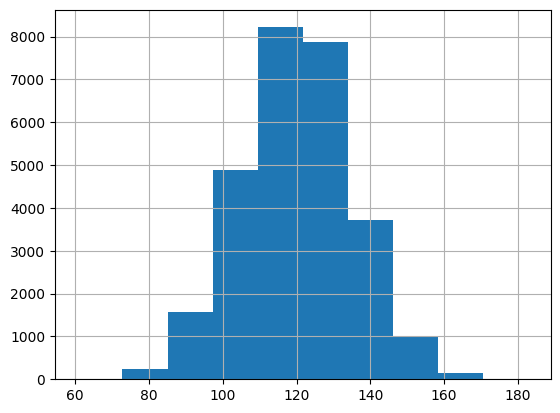

In [13]:
df['blood_pressure'].hist()

In [15]:
df['blood_pressure'].describe()

,blood_pressure
count,27679.000000
mean,120.014711
std,15.053383
min,60.605842
25%,109.823483
50%,120.111696
75%,130.038478
max,182.799505


In [16]:
df['blood_pressure'] = df['blood_pressure'].fillna(df['blood_pressure'].mean())

In [19]:
df.isna()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,...,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
missing_info = pd.DataFrame({
    'dtype': df.dtypes,
    'missing_count': df.isna().sum(),
    'missing_percent': df.isna().mean() * 100
})
print(missing_info)

                            dtype  missing_count  missing_percent
survey_code                 int64              0              0.0
age                         int64              0              0.0
gender                     object              0              0.0
height                    float64              0              0.0
weight                    float64              0              0.0
bmi                       float64              0              0.0
bmi_estimated             float64              0              0.0
bmi_scaled                float64              0              0.0
bmi_corrected             float64              0              0.0
waist_size                float64              0              0.0
blood_pressure            float64              0              0.0
heart_rate                float64              0              0.0
cholesterol               float64              0              0.0
glucose                   float64              0              0.0
insulin   

In [21]:
df['caffeine_intake'].value_counts()

,count
caffeine_intake,
Moderate,10022
High,9967


In [27]:
df['caffeine_intake'] = df['caffeine_intake'].fillna('Unknown')

<Axes: >

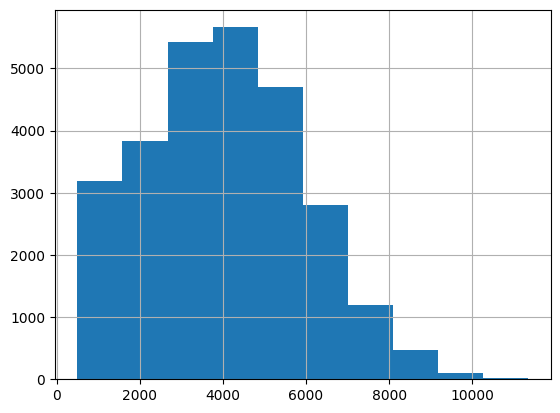

In [29]:
df['income'].hist()

In [31]:
df['income'].describe()

,income
count,27394.000000
mean,4024.457918
std,1939.868424
min,500.000000
25%,2632.408362
50%,3989.135087
75%,5351.945696
max,11349.443420


In [32]:
df['income'] = df['income'].fillna(df['income'].median())

In [35]:
df['gene_marker_flag'].value_counts()

,count
gene_marker_flag,
1.0,26860


In [36]:
df = df.drop(columns=['gene_marker_flag'])

<Axes: >

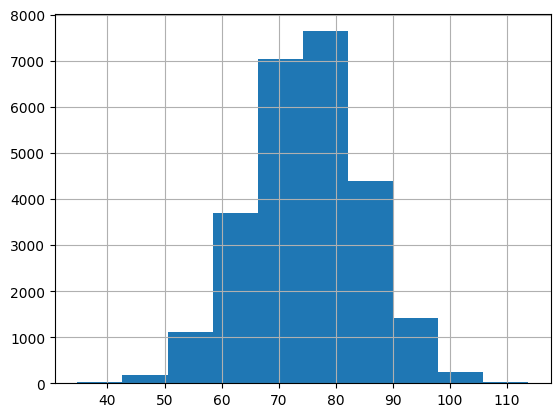

In [38]:
df['heart_rate'].hist()

In [39]:
df['heart_rate'].describe()

,heart_rate
count,25736.000000
mean,74.904096
std,9.997813
min,34.745092
25%,68.166687
50%,75.014065
75%,81.642065
max,113.699566


In [40]:
df['heart_rate'] = df['heart_rate'].fillna(df['heart_rate'].median())

<Axes: >

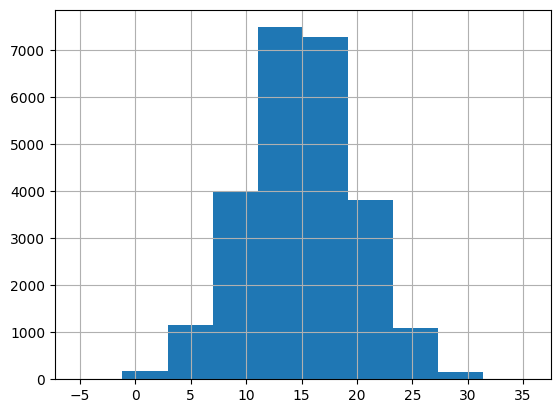

In [44]:
df['insulin'].hist()

In [45]:
df['insulin'].describe()

,insulin
count,25217.000000
mean,15.015134
std,4.996720
min,-5.227445
25%,11.646032
50%,14.990514
75%,18.389274
max,35.464749


In [47]:
df['insulin'] = df['insulin'].mask(df['insulin'] < 0, np.nan)

In [49]:
df['insulin'] = df['insulin'].fillna(df['insulin'].median())

<Axes: >

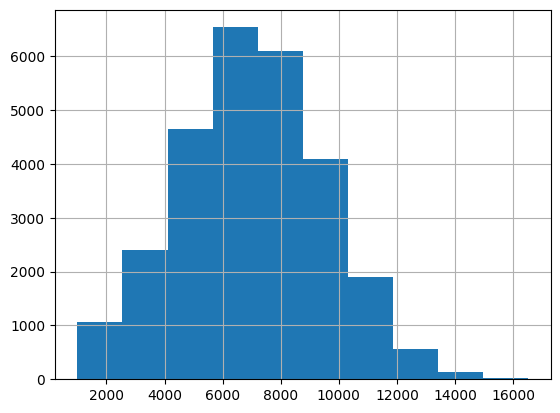

In [51]:
df['daily_steps'].hist()

In [52]:
df['daily_steps'].describe()

,daily_steps
count,27426.000000
mean,7009.876664
std,2504.764514
min,1000.000000
25%,5314.420105
50%,7001.373532
75%,8714.414884
max,16521.256223


In [53]:
df['daily_steps'] = df['daily_steps'].fillna(df['daily_steps'].median())

In [55]:
import scipy.stats as stats

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    corr, pval = stats.pointbiserialr(df[col], df['target'].map({'No':0, 'Yes':1}))
    print(f"{col}: correlation={corr:.3f}, p-value={pval:.3e}")

survey_code: correlation=nan, p-value=nan
age: correlation=nan, p-value=nan
height: correlation=nan, p-value=nan
weight: correlation=nan, p-value=nan
bmi: correlation=nan, p-value=nan
bmi_estimated: correlation=nan, p-value=nan
bmi_scaled: correlation=nan, p-value=nan
bmi_corrected: correlation=nan, p-value=nan
waist_size: correlation=nan, p-value=nan
blood_pressure: correlation=nan, p-value=nan
heart_rate: correlation=nan, p-value=nan
cholesterol: correlation=nan, p-value=nan
glucose: correlation=nan, p-value=nan
insulin: correlation=nan, p-value=nan
sleep_hours: correlation=nan, p-value=nan
work_hours: correlation=nan, p-value=nan
physical_activity: correlation=nan, p-value=nan
daily_steps: correlation=nan, p-value=nan
calorie_intake: correlation=nan, p-value=nan
sugar_intake: correlation=nan, p-value=nan
water_intake: correlation=nan, p-value=nan
screen_time: correlation=nan, p-value=nan
stress_level: correlation=nan, p-value=nan
mental_health_score: correlation=nan, p-value=nan
inc

In [56]:
df['target'].value_counts()

,count
target,
healthy,16500
diseased,13500


In [57]:
target_mapping = {'healthy': 0, 'diseased': 1}
df['target_numeric'] = df['target'].replace(target_mapping)

/tmp/ipython-input-57-3060353490.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target_numeric'] = df['target'].replace(target_mapping)


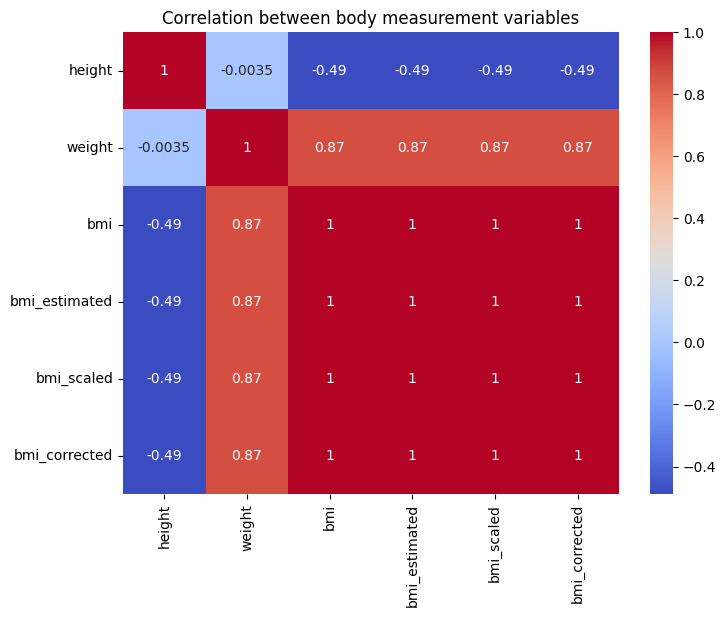

In [59]:
cols_to_check = ['height', 'weight', 'bmi', 'bmi_estimated', 'bmi_scaled', 'bmi_corrected']
corr_matrix = df[cols_to_check].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between body measurement variables')
plt.show()